# Task 3. Schelling’s Model

In [1]:
import numpy as np
import time
import random

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.animation import FuncAnimation, PillowWriter

### 1. Create 9 gifs of map evolution for 9 values of R

In [2]:
x = y = np.arange(0, 100, 1)
Z = np.ndarray(shape=[len(x), len(y)])
empty_spaces = []
Z = np.random.choice(2, size=[len(x), len(y)], p=[0.5, 0.5])

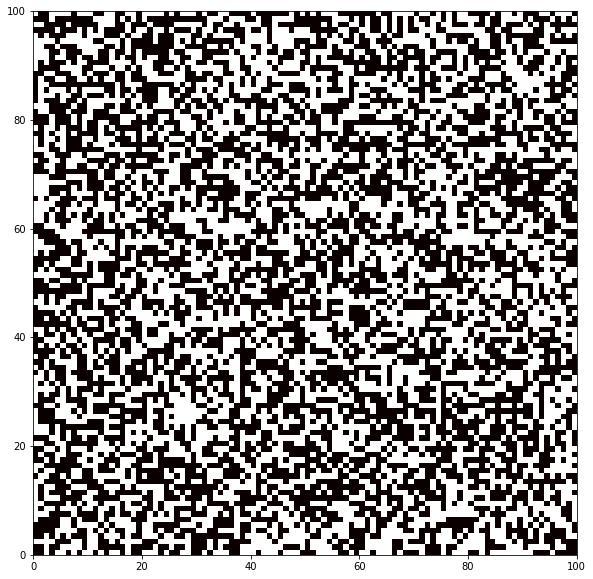

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(Z, cmap=cm.hot, extent=[0, 100, 0, 100])
plt.show()

In [4]:
def is_satisfied(x, y):
    global R, Z
    sum_of_neighbours = Z[(x + 1)%100][(y + 1)%100] + Z[(x + 1)%100][y] + Z[(x + 1)%100][(y - 1)%100] + \
                        Z[x%100][(y + 1)%100] + Z[x%100][y] + Z[(x - 1)%100][(y + 1)%100] + \
                        Z[(x - 1)%100][y] + Z[(x - 1)%100][(y - 1)%100]
    r_current = sum_of_neighbours / 8
    return abs((1 - Z[x][y]) - r_current) > R

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


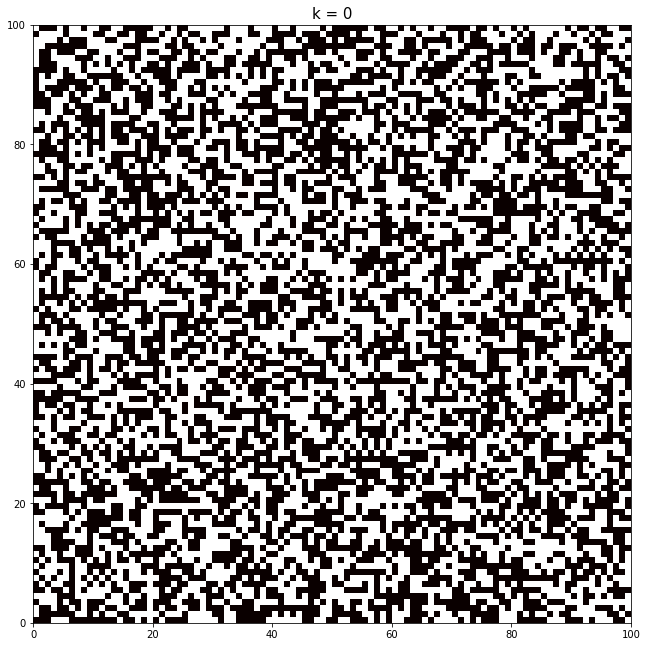

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


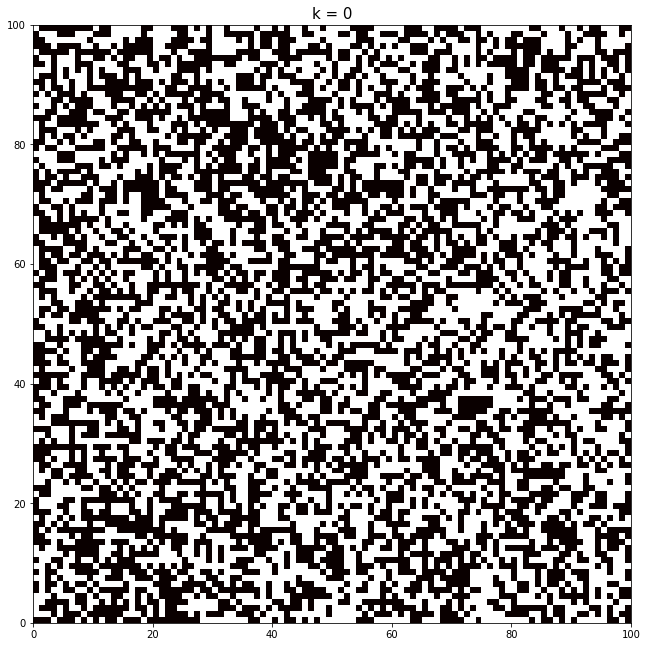

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


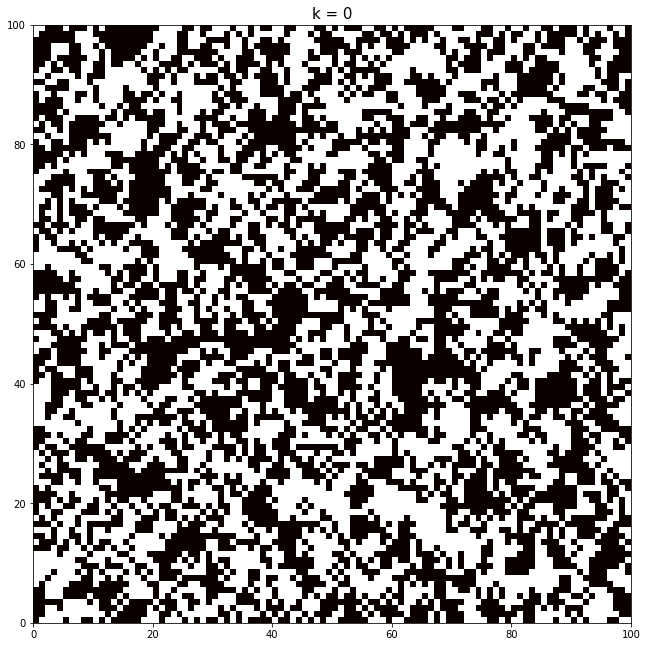

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


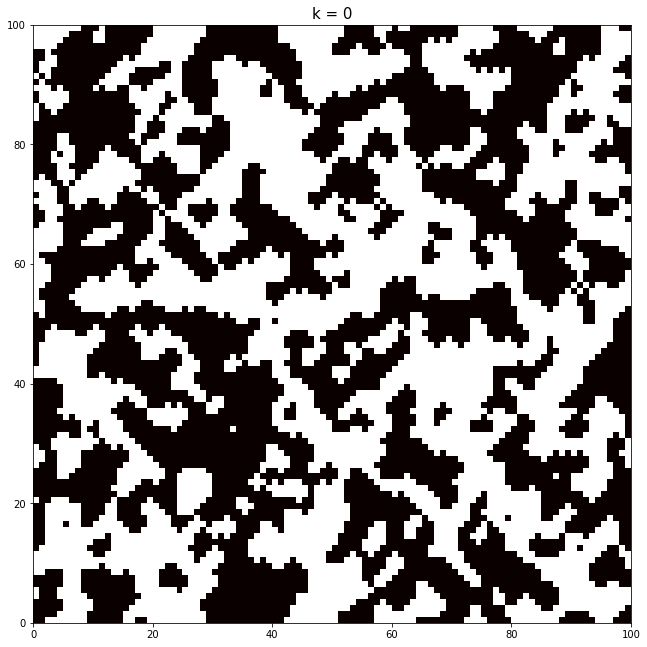

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


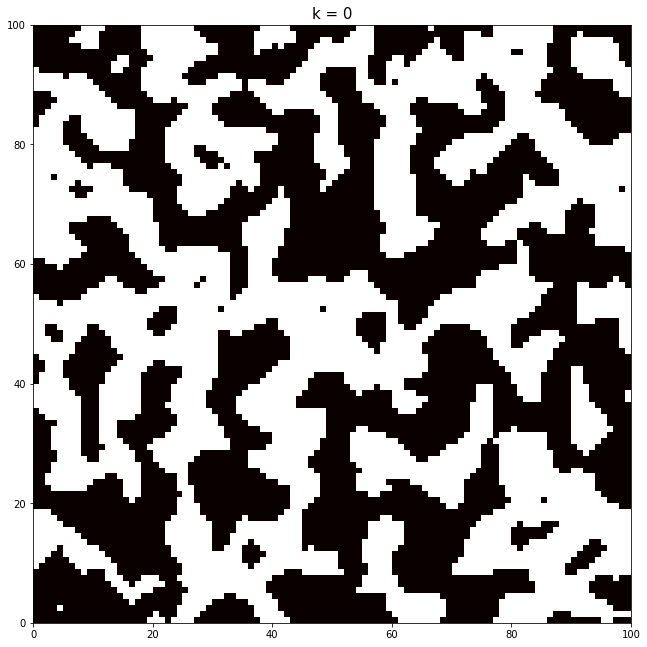

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


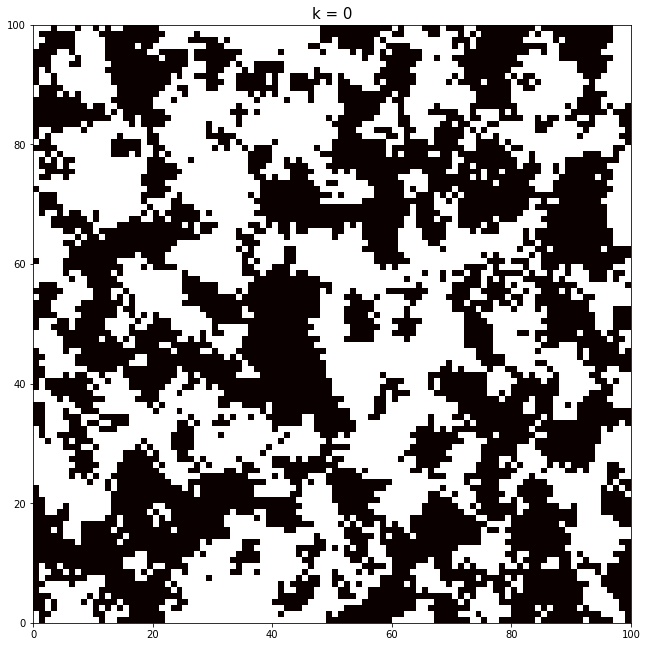

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


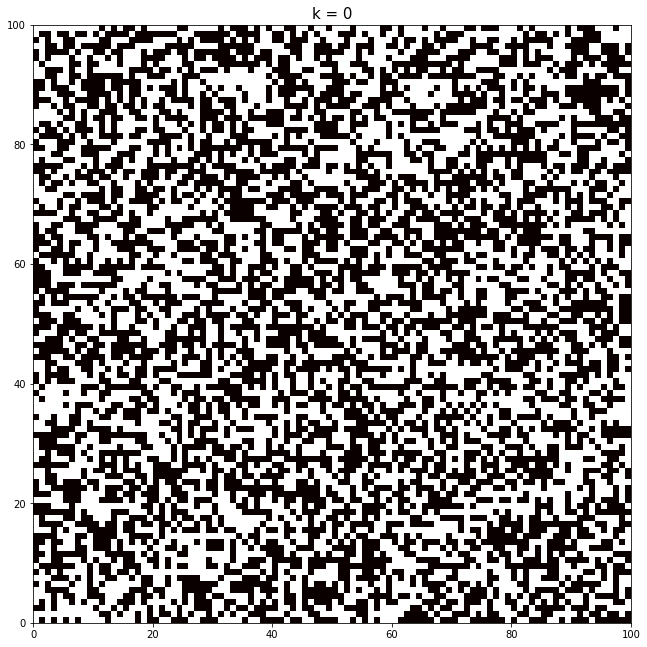

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


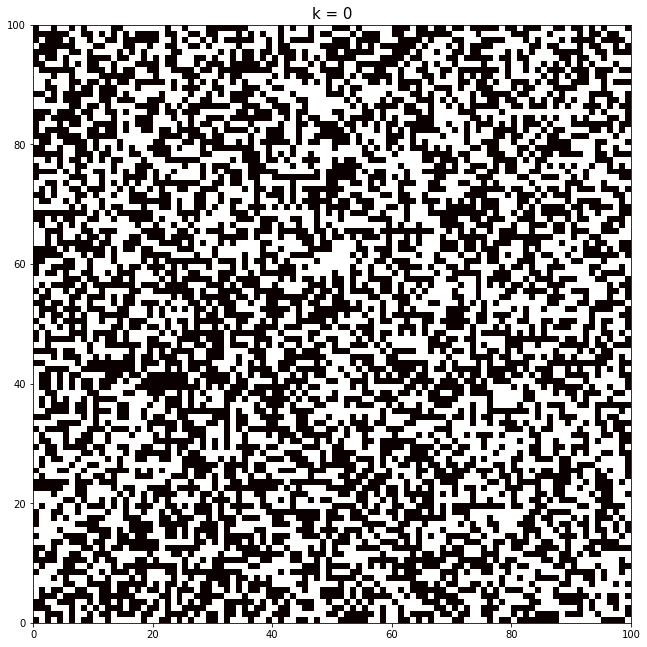

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


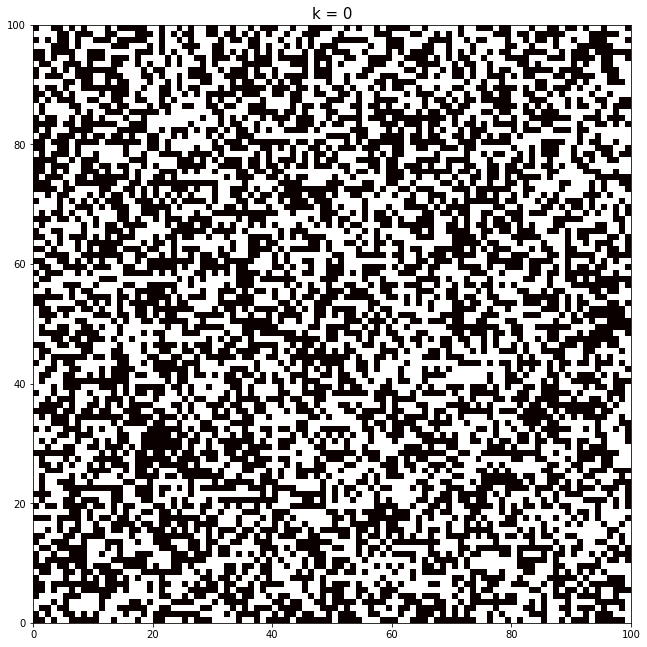

In [9]:
x = y = np.arange(0, 100, 1)
iters = 7
Rs = [0/8, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8]
Rs_names = ["0_8", "1_8", "2_8", "3_8", "4_8", "5_8", "6_8", "7_8", "7_8", "8_8"]
array_of_empty = []

for R, name in zip(Rs, Rs_names):    
    empty_spaces = []
    Z = np.random.choice(2, size=[len(x), len(y)], p=[0.5, 0.5])
    fig, ax = plt.subplots(figsize=(14, 11))
    local_array = []
    
    def update(k):
        global Z
        b_free = 0
        w_free = 0
        for i in range(Z.shape[0]):
            for j in range(Z.shape[0]):
                if not is_satisfied(i, j):
                    empty_spaces.append([i, j])
                    if Z[i][j] == 1:
                        b_free += 1
                    else:
                        w_free += 1
                        
        local_array.append(w_free + b_free) 
        for i_black in range(b_free):
            k_from_list = np.random.randint(len(empty_spaces))
            coord = empty_spaces.pop(k_from_list)
            Z[coord[0], coord[1]] = 1
            
        for i_white in range(w_free):
            k_from_list = np.random.randint(len(empty_spaces))
            coord = empty_spaces.pop(k_from_list)
            Z[coord[0], coord[1]] = 0
            
        ax.set_title("k = " + str(k), size=15)
        ln = ax.imshow(Z, cmap=cm.hot, extent=[0, 100, 0, 100])
        return [ln] 
    
    ani = FuncAnimation(fig, update, frames=np.arange(iters), interval=200)
    name_of_file = 'r_is_' + name +'.gif'
    ani.save(name_of_file, writer='imagemagick', fps=1)
    array_of_empty.append(local_array)
    plt.show()

### 2. Plot number of households that want to move versus time for 9 values of R on one graph, label 9 curves, label the axes and title the graph

In [13]:
len(array_of_empty), len(array_of_empty[0])

(9, 9)

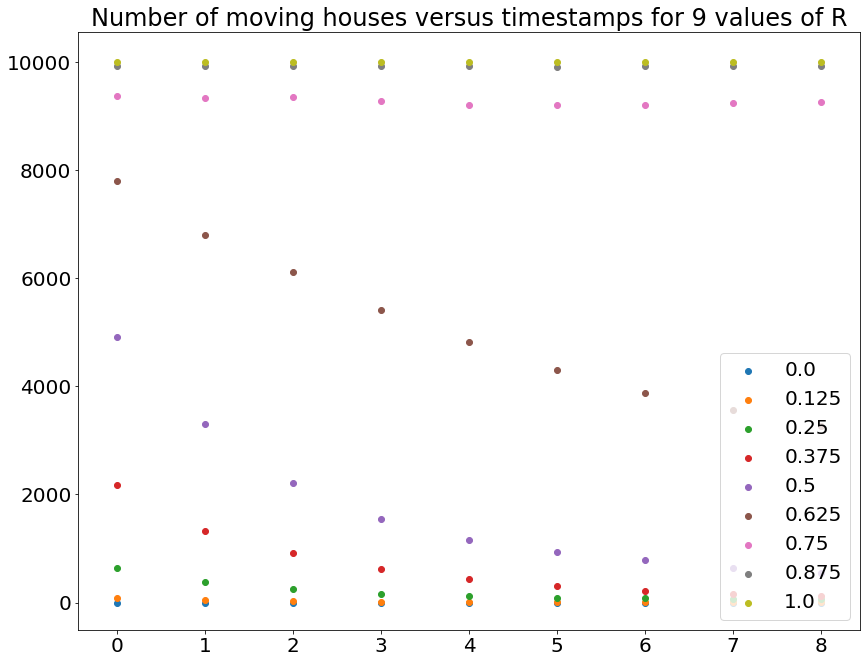

In [14]:
plt.figure(figsize=(14, 11))

plt.title('Number of moving houses versus timestamps for 9 values of R')
for R, array_s in zip(Rs, array_of_empty):
    plt.rcParams.update({'font.size': 20})
    plt.scatter(x=list(range(9)), y=array_s, label=str(R))

plt.legend(loc='lower right')
plt.show();